In [ ]:
# Create a new istance
d.new = c(5.4, 2.7, 4.6, 1.4)
n = nrow(iris)

In [10]:
# Initialization
eucli = rep(NA, 1, n)

# Calculate the Euclidean distance
for (i in 1:n) {
    eucli[i] = sqrt(sum((d.new - iris[i, -5])^2))
}

In [11]:
ind.sort = sort(eucli, index.return=1) # Using index.return it returns the index associated to the distance

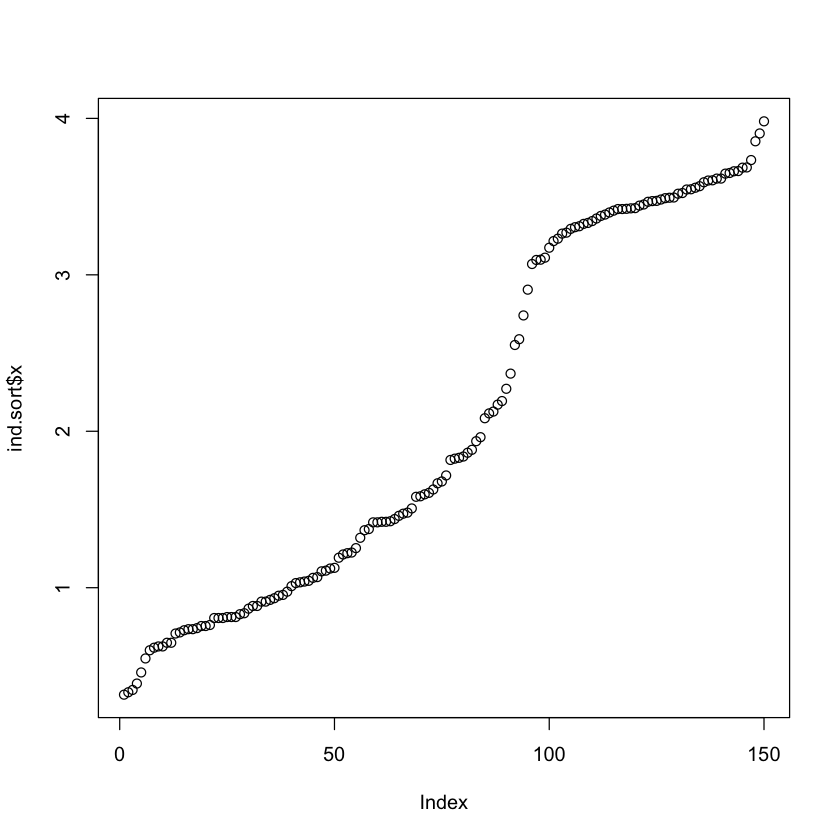

[1] 91

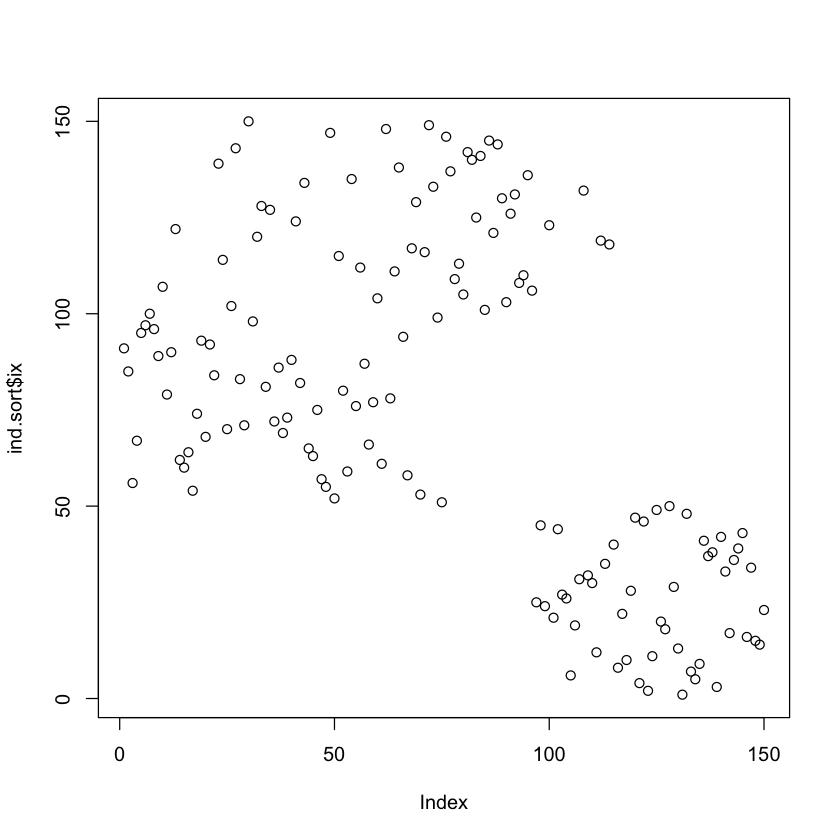

In [40]:
par(bg = "white")

plot(ind.sort$x)
plot(ind.sort$ix)
ind.sort$ix[1]

In [14]:
iris$Species[ind.sort$ix[1]]

[1] versicolor
Levels: setosa versicolor virginica

In [ ]:
set.seed(123)

train_ratio <- 0.75

train_indices <- sample(1:n, size = round(train_ratio * n)) 
# ind.train = sample (n, round(0.75 * n))
# ind.test = setdiff(1:n, ind.train)

iris.train <- iris[train_indices, ] # Rows used for training
iris.test <- iris[-train_indices, ] # Rows used for testing 

In [28]:
library(class)

pred = knn(iris.train[, -5], iris.test[, -5], cl=iris.train$Species, k=1)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  versicolor versicolor versicolor versicolor virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica 
Levels: setosa versicolor virginica

In [30]:
acc.class = function(x, y) {
    stopifnot(length(x) == length(y))
    return(sum(diag(table(x, y))) / length(x))
}

In [31]:
acc.class(pred, iris.test$Species)

[1] 0.9736842

In [33]:
library(caret)

trctrl = trainControl(method = "cv", number = 2)

Loading required package: ggplot2



Loading required package: lattice



k-Nearest Neighbors 

112 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 57, 55 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9555024  0.9329533
   2  0.9467305  0.9198684
   3  0.9464115  0.9191206
   4  0.9555024  0.9329533
   5  0.9555024  0.9329533
   6  0.9464115  0.9192856
   7  0.9642743  0.9460867
   8  0.9551834  0.9324190
   9  0.9642743  0.9460867
  10  0.9464115  0.9192856
  11  0.9555024  0.9328064
  12  0.9291866  0.8932600
  13  0.9467305  0.9196733
  14  0.9467305  0.9196733
  15  0.9464115  0.9191387
  16  0.9642743  0.9460867
  17  0.9555024  0.9328064
  18  0.9642743  0.9460867
  19  0.9376396  0.9056441
  20  0.9285486  0.8919767
  21  0.9464115  0.9189737
  22  0.9464115  0.9189737
  23  0.9467305  0.9196733
  24  0.9110048  0.8660526
  25  0.9022329  0.8530287
  26  0.9113238  0.8666419
  27  0.9110048  0.8660525
  28  0.92

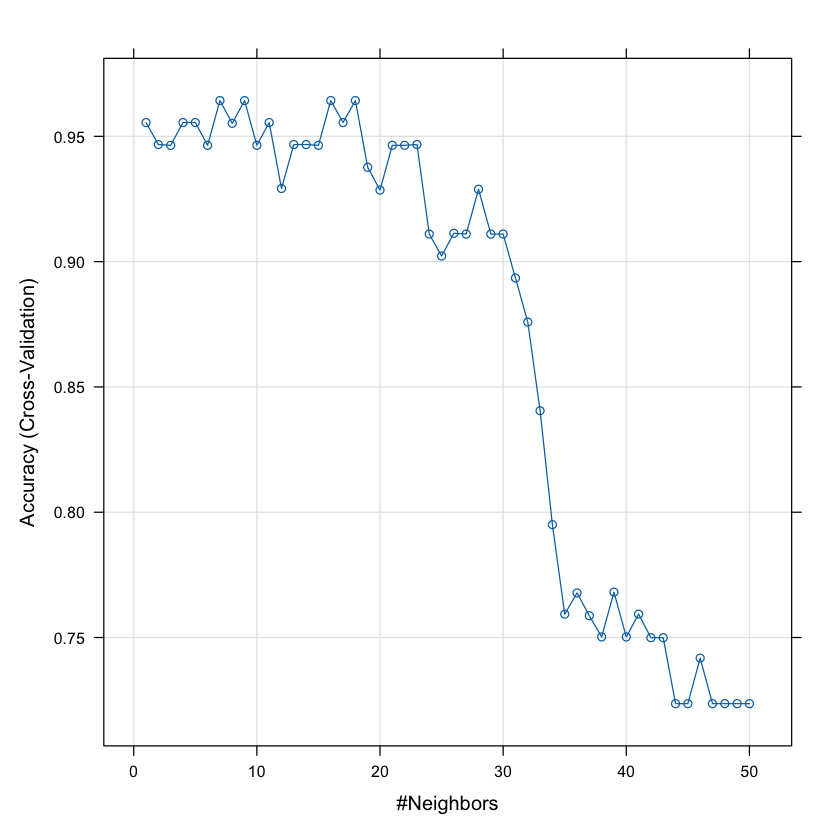

In [48]:
knn.fit = train(Species ~ ., iris.train, # Species in function of what??
    method = "knn",
    trControl = trctrl,
    tuneGrid = expand.grid(k=1:50))
plot(knn.fit)
knn.fit

In [37]:
pred = predict(knn.fit, iris.test)
acc = acc.class(pred, iris.test$Species)
acc

[1] 0.9736842

In [49]:
library(ISLR)

In [59]:
summary(Carseats)
head(Carseats)
str(Carseats)
dataset = Carseats

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [61]:
## evaluation function
rmse <- function(x, y) {
sqrt(mean((x - y)^2))
}

In [ ]:
## train/test division
n = nrow(dataset)

indtrain = sample(1:n, round(0.75*n));
dataset.train = dataset[indtrain, ]

indtest = setdiff(1:n, indtrain);
dataset.test = dataset[indtest, ]

In [ ]:
## test error as a function of k, from k=1 to k=50
library(FNN)

kmax = 50
test.err = rep(***)

for (k in 1:kmax) {
    pred = knn.reg(***)
    test.err[k] = rmse(pred, dataset$Sales)
}

plot(1:kmax, test.err, type = "o", pch = 19,
    xlab = "k", ylab = "RMSE");grid()